In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, cross_validation, metrics

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# label

In [2]:
labels = {
    '0':'file', '1':'network', '2':'service', '3':'database', '4':'communication', '5':'memory', '6':'driver', 
    '7':'system', '8':'application', '9':'io', '10':'others', '11':'security', '12':'disk', '13':'processor'}

fault_label = {
    '0':'file', '1':'network', '2':'service', '3':'database', '4':'communication', '5':'memory', 
    '10':'others', '11':'security', '12':'disk', '13':'processor'}

# load data

In [3]:
X = []
y = []

print("Opening dataset...")
try:
    with open("data_msg_type/semantic_sim.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/semantic_label_index.txt", 'rU') as f:
        res = list(f)
        for line in res:
            y.append(int(line.strip("\n")[0]))
            
except:
    print("Error in reading the train set file.")
    exit()

print("Dataset loaded.")

Opening dataset...
Dataset loaded.


# split data

In [4]:
X = np.array(X) #change to matrix
y = np.array(y) #change to matrix (sklearn models only accept matrices)

# Separate our training data into test and training.
print("Separating data into 80% training set & 20% test set...")
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=33)#add random state here...
print("Dataset separated.\n")

Separating data into 80% training set & 20% test set...
Dataset separated.



# svm-linear train

In [5]:
print("-------------------------- SVM, Kernel = Linear --------------------------")
#C_linear = [0.1, 3, 10, 100...]
C_linear = [1]
result_linear = []

print("C value chosen from: ", C_linear)
print("Calculating accuracy with K-fold...")

for C in C_linear:
    svc_linear = svm.SVC(kernel='linear', C=C)
    scores = cross_validation.cross_val_score(
        svc_linear, X_train, y_train, scoring='accuracy', cv=14)
    result_linear.append(scores.mean())

print("result:", result_linear)

-------------------------- SVM, Kernel = Linear --------------------------
('C value chosen from: ', [1])
Calculating accuracy with K-fold...


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=14.
  % (min_labels, self.n_folds)), Warning)


('result:', [0.94120012560544619])


# svm-linear test and predict

In [6]:
# Result with different C are equal, so here choose C=1 directly as the best parameter.
best_param_linear = {"C": 1}
linear_test = svm.SVC(kernel='linear', C=best_param_linear.get("C")).fit(X_train, y_train)
linear_test_score = linear_test.score(X_test, y_test)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_test)):
    count2 += 1
    classinrow = X_test[i]
    classinrow = np.array(X_test[i]).reshape(1,-1)
    predicted = linear_test.predict(classinrow)#predict class.
    actual = y_test[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1

print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)
print("Linear Kernel test score: ", linear_test_score)

('Total cases: ', 20000)
('Correct Prediction: ', 18804)
('Correct prediction rate: ', 0.9402)
('Linear Kernel test score: ', 0.94020000000000004)


# svm-linear plot

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


               precision    recall  f1-score   support

      network       0.85      0.16      0.27       815
         file       0.85      0.95      0.90      1815
     database       1.00      0.89      0.94       506
      service       0.00      0.00      0.00         1
       memory       0.79      0.97      0.87      2429
communication       0.96      0.89      0.92       961
       others       1.00      1.00      1.00     12456
     security       0.99      0.75      0.86       595
         disk       0.66      1.00      0.79       422

  avg / total       0.95      0.94      0.93     20000

[[  133    52     0     0   513    22     0     2    93]
 [   16  1731     0     0    35     8     0     0    25]
 [    1     1   449     0     0     0     0     0    55]
 [    0     1     0     0     0     0     0     0     0]
 [    0    75     0     0  2347     0     0     0     7]
 [    0    92     0     0    11   853     0     2     3]
 [    0     1     0     0     0     1 12421     0 

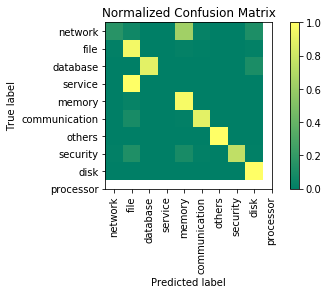

In [7]:
# cmap can be changed to many colors, (colormaps.Oranges,OrRd, etc)
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.summer):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
print(metrics.classification_report(
    actualist, predlist, target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)

# svm-rbf train

In [8]:
print("-------------------------- SVM, Kernel = RBF --------------------------")
#C_rbf = [0.1, 3, 10, 100...]
C_rbf = [1]
result_rbf = []

print("C value chosen from: ", C_rbf)
print("Calculating accuracy with K-fold...")

for C in C_rbf:
    svc_rbf = svm.SVC(kernel='rbf', C=C)
    scores = cross_validation.cross_val_score(
        svc_rbf, X_train, y_train, scoring='accuracy', cv=14)
    result_rbf.append(scores.mean())

print("result:", result_rbf)

-------------------------- SVM, Kernel = RBF --------------------------
('C value chosen from: ', [1])
Calculating accuracy with K-fold...
('result:', [0.80505025270285058])


# svm-rbf test and predict

In [9]:
# Result with different C are equal, so here choose C=1 directly as the best parameter.
best_param_rbf = {"C": 1}
rbf_test = svm.SVC(kernel='rbf', C=best_param_rbf.get("C")).fit(X_train, y_train)
rbf_test_score = rbf_test.score(X_test, y_test)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_test)):
    count2 += 1
    classinrow = X_test[i]
    classinrow = np.array(X_test[i]).reshape(1,-1)
    predicted = rbf_test.predict(classinrow)#predict class.
    actual = y_test[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1

print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)
print("RBF Kernel test score: ", rbf_test_score)

('Total cases: ', 20000)
('Correct Prediction: ', 16174)
('Correct prediction rate: ', 0.8087)
('RBF Kernel test score: ', 0.80869999999999997)


# svm-rbf plot

               precision    recall  f1-score   support

      network       0.44      0.08      0.13       815
         file       0.67      0.38      0.49      1815
     database       1.00      0.89      0.94       506
      service       0.00      0.00      0.00         1
       memory       0.66      0.92      0.77      2429
communication       0.30      0.32      0.31       961
       others       0.89      1.00      0.94     12456
     security       0.00      0.00      0.00       595
         disk       0.00      0.00      0.00       422

  avg / total       0.75      0.81      0.77     20000

[[   64   138     0     0   551    29    33     0     0]
 [   15   697     0     0    62   264   777     0     0]
 [   28     0   450     0    28     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0]
 [    3   159     0     0  2237     4    26     0     0]
 [    5    20     0     0     9   307   620     0     0]
 [   19     3     0     0    14     1 12419     0 

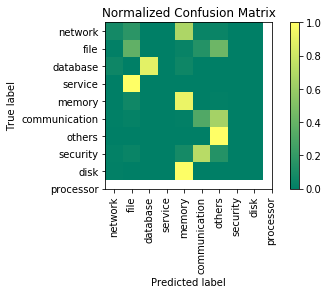

In [10]:
# cmap can be changed to many colors, (colormaps.Oranges,OrRd, etc)
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.summer):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
print(metrics.classification_report(
    actualist, predlist, target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)

# svm-poly train

In [11]:
print("-------------------------- SVM, Kernel = Poly --------------------------")
#C_poly = [0.1, 3, 10, 100...]
C_poly = [1]
result_poly = []

print("C value chosen from: ", C_poly)
print("Calculating accuracy with K-fold...")

for C in C_poly:
    svc_poly = svm.SVC(kernel='poly', C=C)
    scores = cross_validation.cross_val_score(
        svc_poly, X_train, y_train, scoring='accuracy', cv=14)
    result_poly.append(scores.mean())

print("result:", result_poly)

-------------------------- SVM, Kernel = Poly --------------------------
('C value chosen from: ', [1])
Calculating accuracy with K-fold...
('result:', [0.64812567986322434])


# svm-poly test and predict

In [12]:
# Result with different C are equal, so here choose C=1 directly as the best parameter.
best_param_poly = {"C": 1}
poly_test = svm.SVC(kernel='poly', C=best_param_poly.get("C"), 
                    #degree=best_param_poly.get("degree")
                   ).fit(X_train, y_train)
poly_test_score = poly_test.score(X_test, y_test)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_test)):
    count2 += 1
    classinrow = X_test[i]
    classinrow = np.array(X_test[i]).reshape(1,-1)
    predicted = poly_test.predict(classinrow)#predict class.
    actual = y_test[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1

print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)
print("Poly Kernel test score: ", poly_test_score)

('Total cases: ', 20000)
('Correct Prediction: ', 12880)
('Correct prediction rate: ', 0.644)
('Poly Kernel test score: ', 0.64400000000000002)


# svm-poly plot

               precision    recall  f1-score   support

      network       1.00      0.01      0.02       815
         file       0.78      0.23      0.35      1815
     database       0.00      0.00      0.00       506
      service       0.00      0.00      0.00         1
       memory       0.00      0.00      0.00      2429
communication       0.83      0.01      0.02       961
       others       0.64      1.00      0.78     12456
     security       0.00      0.00      0.00       595
         disk       0.00      0.00      0.00       422

  avg / total       0.55      0.64      0.52     20000

[[    7    24     0     0     0     1   783     0     0]
 [    0   410     0     0     0     0  1405     0     0]
 [    0     1     0     0     0     0   505     0     0]
 [    0     0     0     0     0     0     1     0     0]
 [    0     0     0     0     0     0  2429     0     0]
 [    0    88     0     0     0    10   863     0     0]
 [    0     0     2     0     0     1 12453     0 

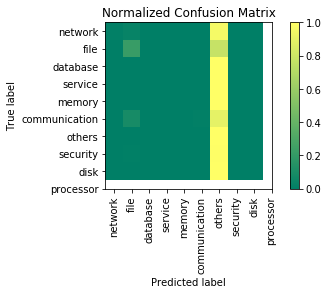

In [13]:
# cmap can be changed to many colors, (colormaps.Oranges,OrRd, etc)
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.summer):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
print(metrics.classification_report(
    actualist, predlist, target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)